# Linear Regression with Machine Learning -- Part 1

This notebook is for a workshop at STLinATL 2023. It is inspired by the course [Supervised Machine Learning: Regression and Classification](https://www.coursera.org/learn/machine-learning/home/info) by Andrew Ng.


## Problem Statement

You want to use ML to predict housing price given the size of the house. The input is size of the house, and the output is the price.

Although impractical, in this case our training set only has two samples (also called *examples*).


| Size (1000 sqft)     | Price (1000s of dollars) |
| -------------------| ------------------------ |
| 1                 | 300                      |
| 2                  | 500                      |


## Goals

You will

- plot training data.
- define a model function $f$ to calculate the predicted output $f_{w,b}(x^{(i)})$ for a given input $x^{(i)}$.
- calculate and plot the cost function.
- find the values of the parameters that minimize the cost function.

## Notation
Here is a summary of the notation we will use.  

|General <img width=70/> <br />  Notation  <img width=70/> | Description<img width=350/>| Python (if applicable) |
|: ------------|: ------------------------------------------------------------||
| $a$ | scalar                                                      ||
| $\vec{a}$ | vector                                                      ||
| **Regression** |         |    |     |
|  $\vec{x}$ | inputs, or features: in this notebook, Size (1000 sqft)  | `x_train` |   
|  $\vec{y}$  | output, or targets: in this notebook, Price (1000s of dollars)  | `y_train` 
|  $x^{(i)}$, $y^{(i)}$ | $i_{th}$ training example | `x_i`, `y_i`|
| m | number of training examples | `m`|
|  $w$  |  parameter: weight,                                 | `w`    |
|  $b$           |  parameter: bias                                           | `b`    |     
| $f_{w,b}(x^{(i)})$ | The result of the model evaluation at $x^{(i)}$ parameterized by $w,b$: $f_{w,b}(x^{(i)}) = wx^{(i)}+b$  | `f_wb` | 


## Import

Import common Python packages.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec
from matplotlib.colors import LinearSegmentedColormap

%matplotlib notebook

## Training Set

Define the training set.

In [2]:
# x_train is the input variable (size in 1000 square feet)
# y_train is the target (price in 1000s of dollars)
x_train = np.array([1.0, 2.0])
y_train = np.array([300.0, 500.0])
print(f"x_train = {x_train}")
print(f"y_train = {y_train}")

# m is the number of training examples
m = len(x_train)
print(f"Number of training examples is: {m}")

x_train = [1. 2.]
y_train = [300. 500.]
Number of training examples is: 2


## Plot the training set

You can plot the training set using the `scatter()` function in the `matplotlib` library, as shown in the cell below. 

The function arguments `marker` and `c` show the points as red crosses (the default is blue dots). You can use other functions in the `matplotlib` library to set the title and labels to display

In this case, the code needed to plot the training set is in the function `plot_train()` so that we can call it later with a different training set.

In [3]:
def plot_train(x, y):
    """
    Plots the training set
    
    Args:
      x (ndarray (m,)): input features, m examples 
      y (ndarray (m,)): target values
      
    Returns
      fig (Figure): pyplot figure
    """
    
    #create a figure
    fig = plt.figure()
    
    # Plot the data points
    plt.scatter(x_train, y_train, marker='x', c='r')

    # Set the title
    plt.title("Housing Prices")

    # Set the y-axis label
    plt.ylabel('Price (in 1000s of dollars)')

    # Set the x-axis label
    plt.xlabel('Size (1000 sqft)')

    # Display the plot
    plt.show()
    
    return fig

<IPython.core.display.Javascript object>


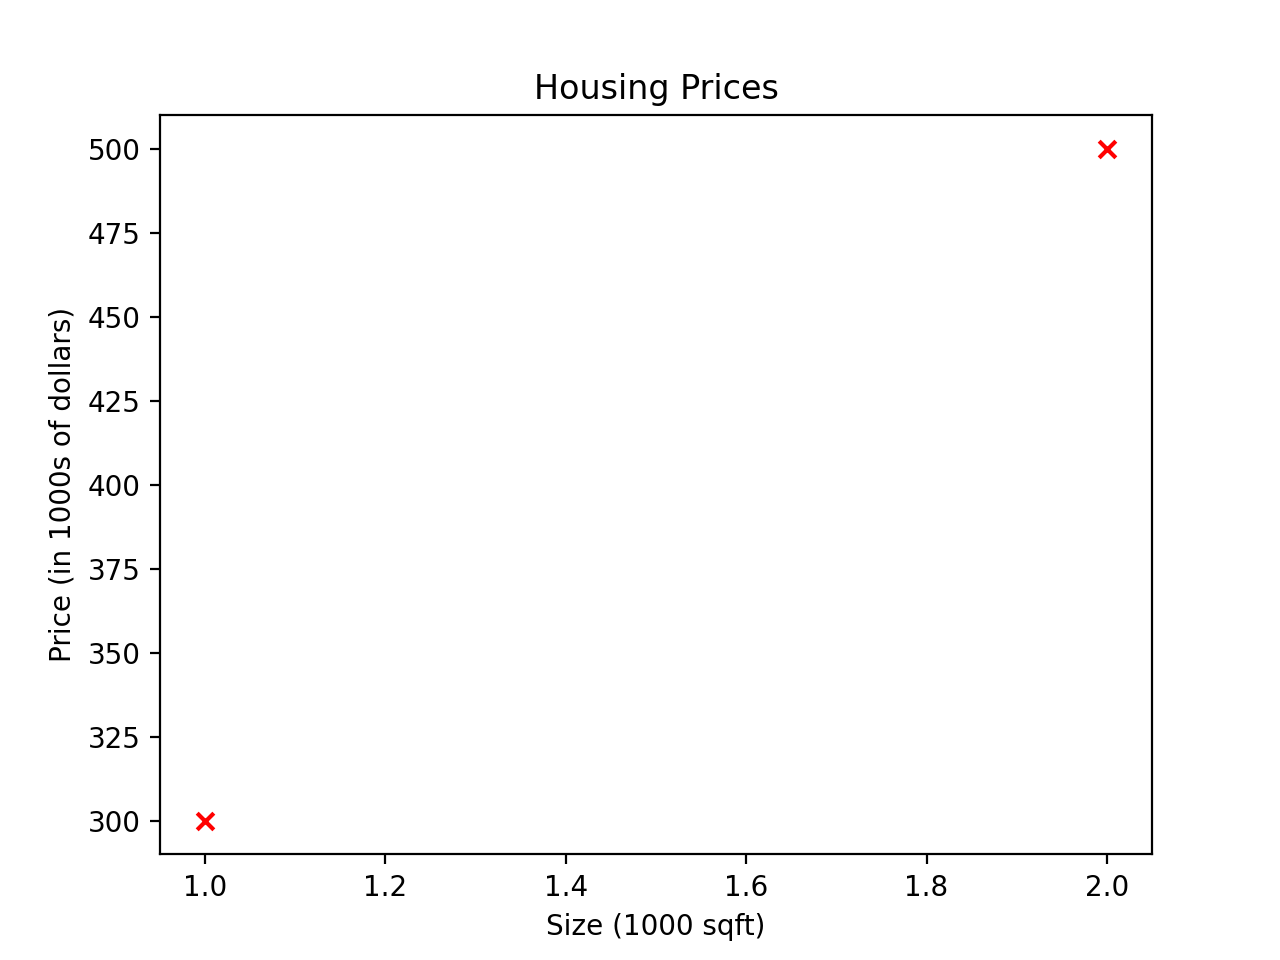

In [4]:
fig = plot_train(x_train,y_train)

## Define the model function $f_{wb}(x^{(i)})$

The `calc_f()` python function calculates and returns the prediction, $f_{wb}(x^{(i)})$, for a given input variable.

In [5]:
def calc_f(x, w, b):
    """
    Computes the prediction f_wb of a linear model
    
    Args:
      x (ndarray (m,)): input features, m examples 
      w,b (scalar)    : model parameters  
      
    Returns
      f_wb (ndarray (m,)): target values
    """
    
    m = x.shape[0]
    f_wb = np.zeros(m)
    for i in range(m):
        f_wb[i] = w * x[i] + b
        
    return f_wb

## Plot predicted output

Create a function to plot the training set along with the predicted values of the model.

In [6]:
def plot_model_and_train(x, y, w, b):
    """
    Plots the training set with the model's prediction
    
    Args:
      x (ndarray (m,)): input features, m examples 
      y (ndarray (m,)): target values
      w (float or int): weight
      b (float or int): bias
      
    Returns
      fig (Figure): pyplot figure
    """
    
    f_wb = calc_f(x, w, b,)
    
    # Create figure
    fig = plt.figure()

    # Plot our model prediction
    plt.plot(x, f_wb, c='b',label='Our Prediction')

    # Plot the data points
    plt.scatter(x, y, marker='x', c='r',label='Actual Values')

    # Set the title
    plt.title("Housing Prices")
    # Set the y-axis label
    plt.ylabel('Price (in 1000s of dollars)')
    # Set the x-axis label
    plt.xlabel('Size (1000 sqft)')
    plt.legend()
    plt.show()

Define the model parameters $w$ and $b$ and plot the model's prediction.

w: 100
b: 100


<IPython.core.display.Javascript object>


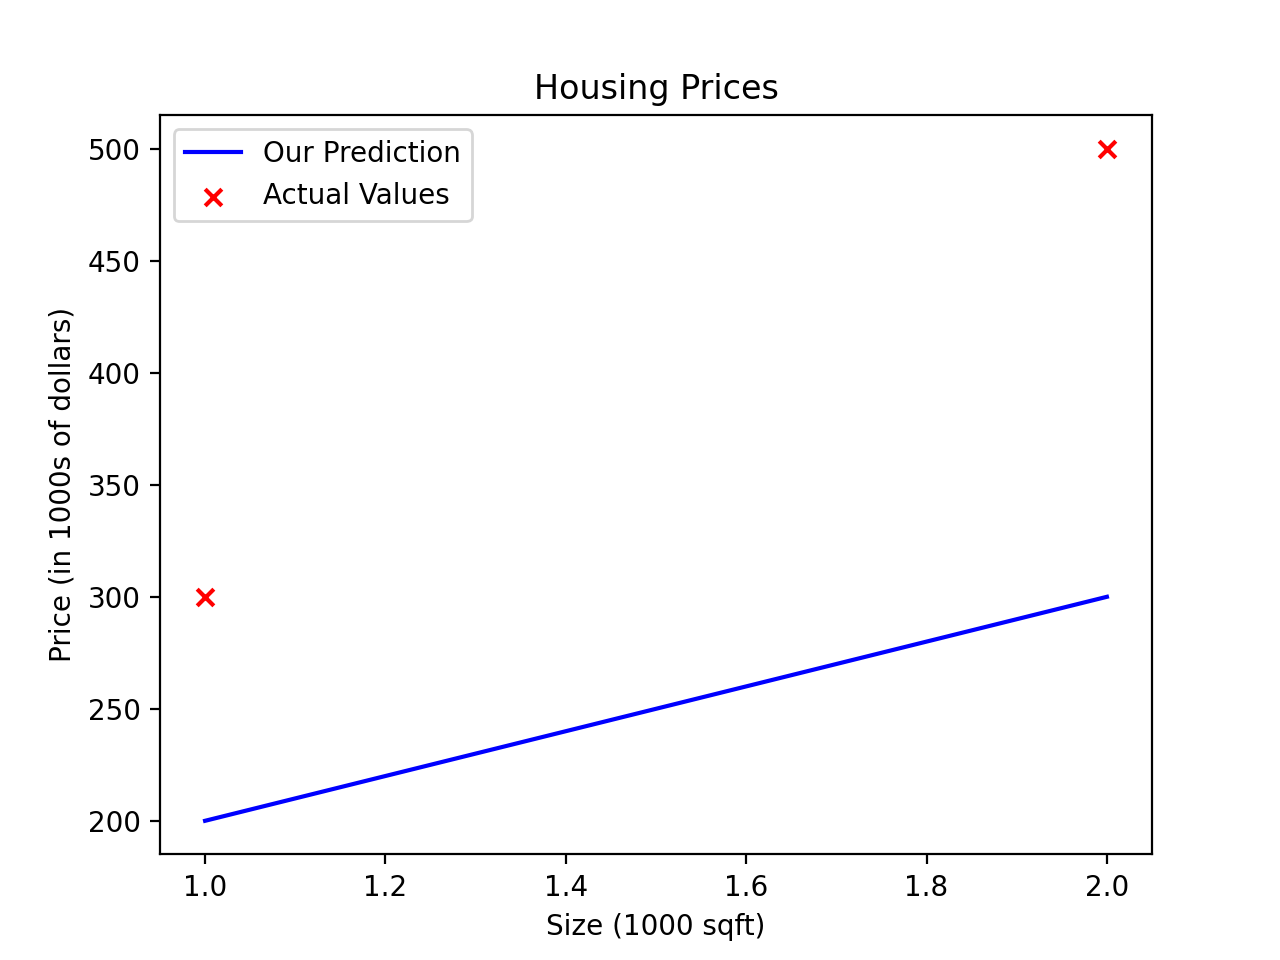

In [7]:
w = 100
b = 100
print(f"w: {w}")
print(f"b: {b}")

fig = plot_model_and_train(x_train,y_train,w,b)

## Exercise 1

Change the model parameters `w` and `b` in the cell above and replot the model (prediction). Continue adjusting `w` and `b` until the model approximately fits the training set.

What did you find for the best values of `w` and `b`?

## Computing Cost
The **cost** is a way of calculating the error in the predicted output of the model. The term **cost** in this case might be a little confusing since the target variable is housing cost. However, the **cost** is a measure of how well our model predicts the target price of the house. To avoid confusion, the term *price* is used for the target variable.

The equation for cost with one input variable is:
  $$J(w,b) = \frac{1}{2m} \sum\limits_{i = 0}^{m-1} (f_{w,b}(x^{(i)}) - y^{(i)})^2 \tag{1}$$ 
 
where 
  $$f_{w,b}(x^{(i)}) = wx^{(i)} + b \tag{2}$$
  
- $f_{w,b}(x^{(i)})$ is our prediction for example $i$ using parameters $w,b$.  
- $(f_{w,b}(x^{(i)}) -y^{(i)})^2$ is the squared difference between the target value and the prediction.   
- These differences are summed over all the $m$ examples and divided by `2m` to produce the cost, $J(w,b)$.

>Note, in math summation ranges are typically from 1 to m, while code will be from 0 to m-1.


The code below creats a function that calculates cost by looping over each example. In each loop:
- a prediction is calculated using `f_wb`
- the difference between the target and the prediction is calculated and squared.
- the total cost (sum) is updated.

In [8]:
def compute_cost(x, y, w, b): 
    """
    Computes the cost function for linear regression.
    
    Args:
      x (ndarray (m,)): Data, m examples 
      y (ndarray (m,)): target values
      w,b (scalar)    : model parameters  
    
    Returns
        total_cost (float): The cost of using w,b as the parameters for linear regression
               to fit the data points in x and y
    """
    # number of training examples
    m = x.shape[0] 
    
    cost_sum = 0 
    for i in range(m): 
        f_wb = w * x[i] + b   
        cost = (f_wb - y[i]) ** 2  
        cost_sum = cost_sum + cost  
    total_cost = (1 / (2 * m)) * cost_sum  

    return total_cost

For a fixed value of $b$ and a range of values of the parameter $w$, calculate and plot $J_w(x^{(i)})$ vs. $w$. 

In [9]:
def plot_cost_w(x, y, w, b):
    """
    Plots the cost vs. w for a fixed b
    
    Args:
      x (ndarray): array of input features
      y (ndarray): array of output features
      w (ndarray): array of weights 
      b (float or int): fixed bias
      
    Returns
    fig (Figure): pyplot figure
    """
    
    J_arr = np.zeros(len(w_arr)) #initialize cost array

    #calculate and store J for each value of w
    for i in range(len(w)):
        w = w_arr[i]
        J = compute_cost(x, y, w, b)
        J_arr[i] = J
        
    # Create figure
    fig = plt.figure()

    # Plot our model prediction
    plt.plot(w_arr, J_arr, c='b',label='Cost')

    # Set the title
    plt.title("Cost vs. w (with fixed value of b)")
    # Set the y-axis label
    plt.ylabel('Cost, J (1000s of dollars, squared)')
    # Set the x-axis label
    plt.xlabel('w (dollars per sq. ft)')
    # show grid
    plt.grid()
    plt.show()
    
    Jmin = np.amin(J_arr)
    minIndex = np.argmin(J_arr)
    wmin = w_arr[minIndex]
    print(f"The minimum cost is J={Jmin:.2e} at w={wmin:d}.")
    
    return fig

<IPython.core.display.Javascript object>


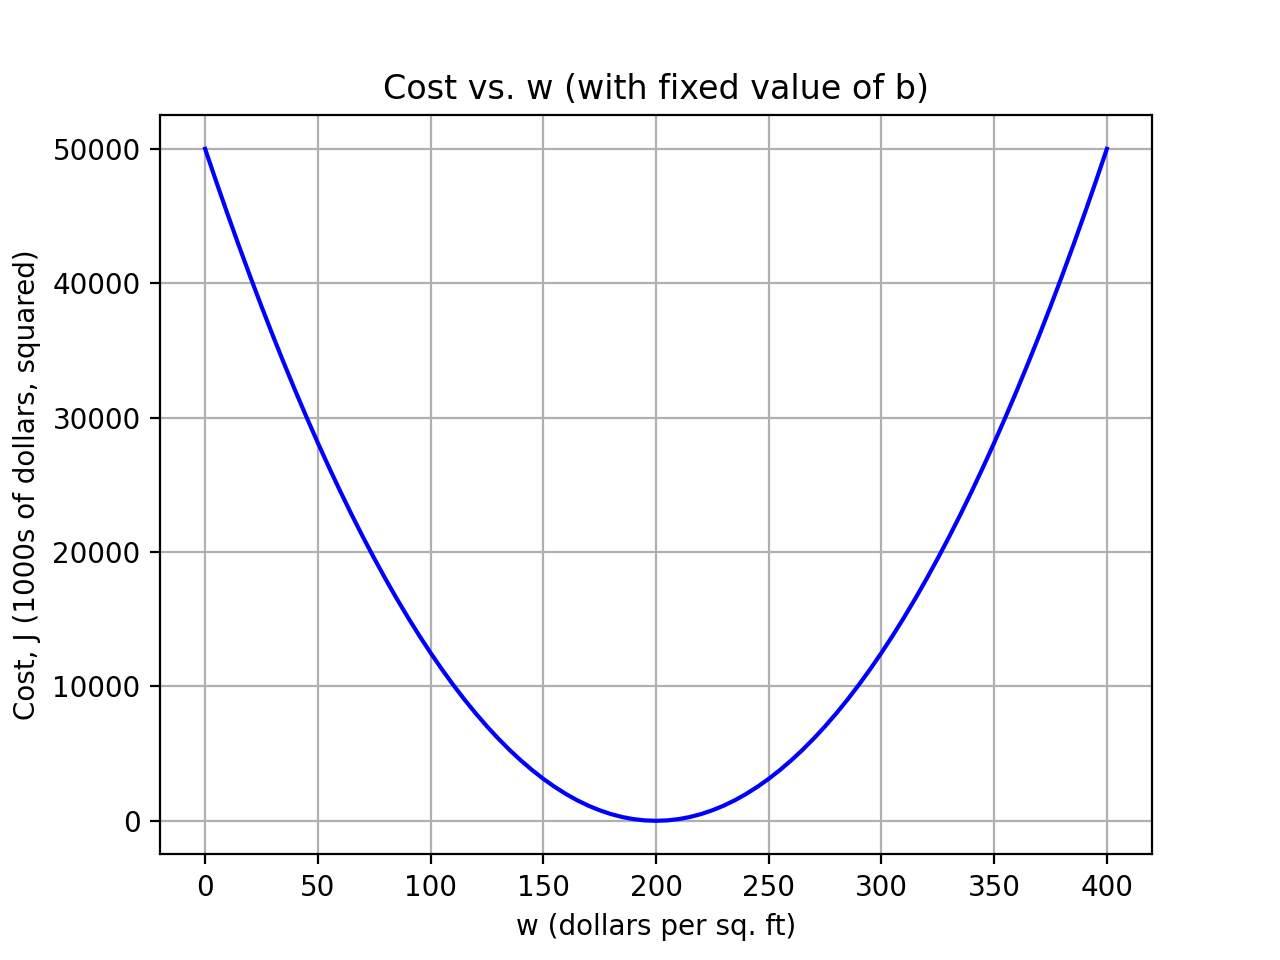

The minimum cost is J=0.00e+00 at w=200.


In [10]:
b = 100 #fixed value of b
w_arr = np.arange(0,405,5) #range of values of w

fig = plot_cost_w(x_train, y_train, w_arr, b)

## Exercise 2

Examine the graph of $J$ vs. $w$. 

1. What is $w$ when $J$ is a minimum?

2. How does the minimum value of $w$ compare to what you found by trial and error?

## Using more examples in the training set

Here is a larger training set.

In [11]:
x_train = np.array([1.0, 1.7, 2.0, 2.5, 3.0, 3.2])
y_train = np.array([250, 300, 480,  430,   630, 730,])

## Exercise 3

In the code cell below, change the values of `w` and `b` for the model and see if you can find the values that appear to minimize the cost. (The minimum cost is not calculated in this code. Thus, you'll have to use the "eye test".)

w: 100
b: 0


<IPython.core.display.Javascript object>


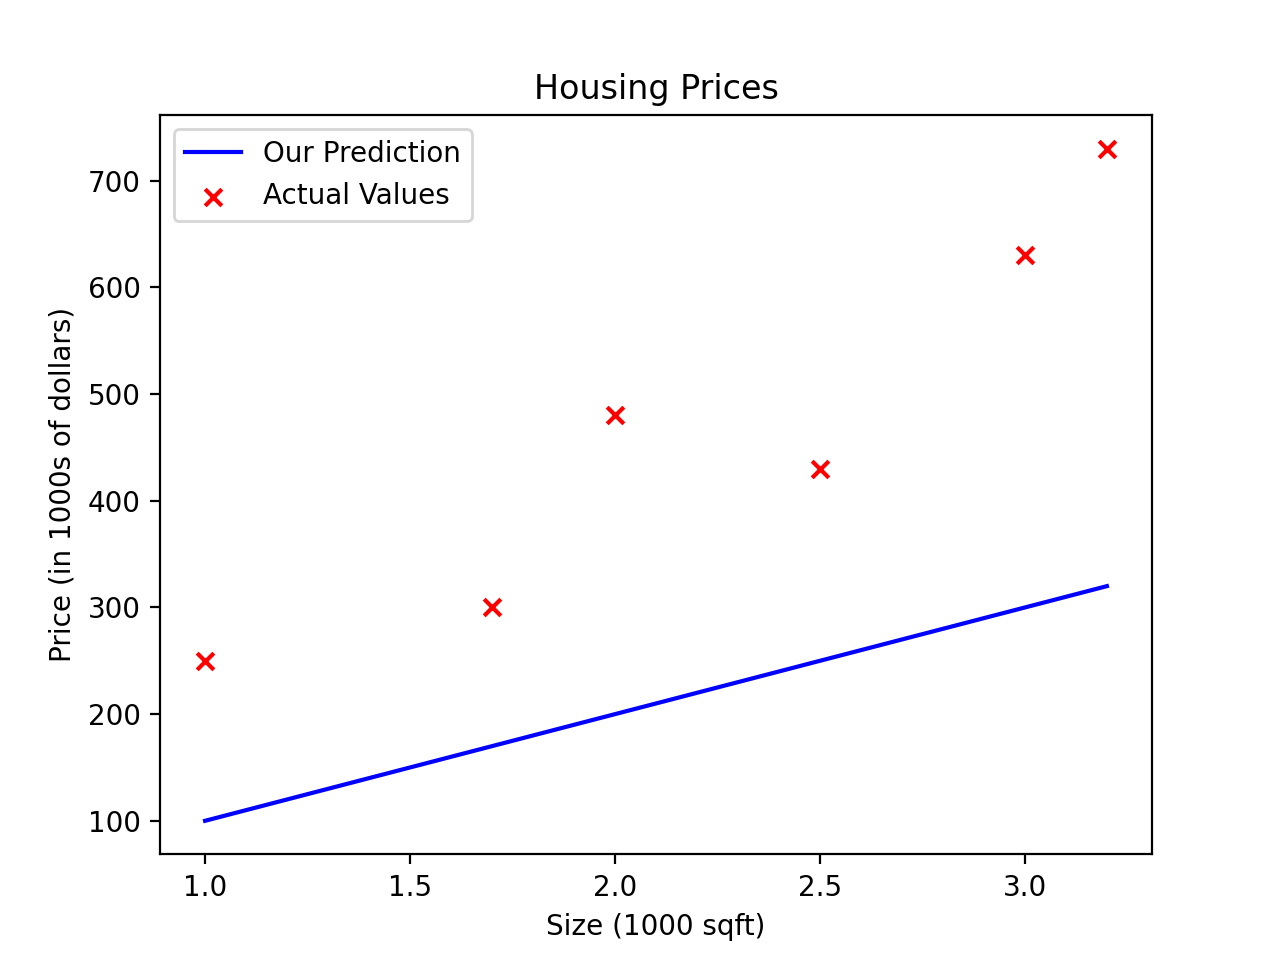

In [12]:
w = 100
b = 0
print(f"w: {w}")
print(f"b: {b}")

fig = plot_model_and_train(x_train, y_train, w, b)

The code below plots $J_w(x^{(i)})$ vs. $w$ and prints the value of $w$ at the minimum of $J$. 

1. Change the value of $b$ and see how it affects the value of $w$ where $J$ is a minimum. Does the value of $b$ affect the value of $w$ that minimizes the cost function?
2. How can you change the code in the cell below in order to find a more precise value of `w` that minimizes the cost?

<IPython.core.display.Javascript object>


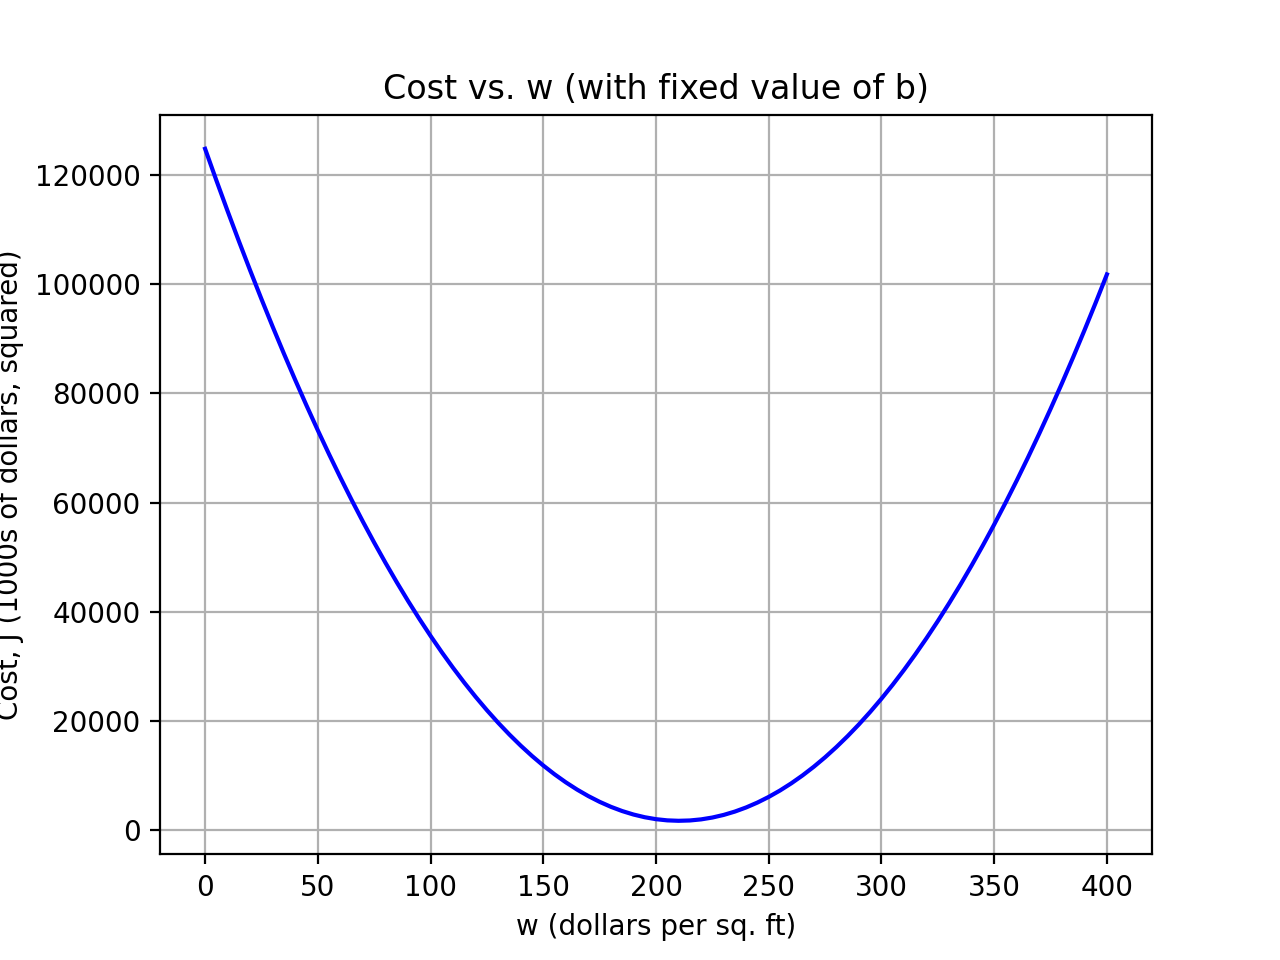

The minimum cost is J=1.74e+03 at w=210.


In [13]:
b = 0 #fixed value of b
w_arr = np.arange(0,405,5) #range of values of w

fig = plot_cost_w(x_train, y_train, w_arr, b)

## Visually finding the minimum cost with two parameters

Instead of using a fixed value of $b$ and changing $w$ until $J$ is minimum, we can change both $b$ and $w$. However, we will need to plot $J$ as a function of both $w$ and $b$, or $J(w,b)$. Let's use a 3D surface plot where $J$ is the *height* on the plot.

The graphs shown below depict $J$ in both a 3D surface plot and a 2D contour plot.

In [14]:
def plt_cost_3d(x, y, w, b):
    """
    Plots the cost as a function of w and b
    
    Args:
      x (ndarray): array of input features
      y (ndarray): array of output features
      w (ndarray): array of weights 
      b (float or int): array of biases
      
    Returns
    fig (Figure): pyplot figure
    """

    # define colors
    dlblue = '#0096ff'; dlorange = '#FF9300'; dldarkred='#C00000'; dlmagenta='#FF40FF'; dlpurple='#7030A0';
    dlcolors = [dlblue, dlorange, dldarkred, dlmagenta, dlpurple]
    dlc = dict(dlblue = '#0096ff', dlorange = '#FF9300', dldarkred='#C00000', dlmagenta='#FF40FF', dlpurple='#7030A0')
    n_bin = 5
    dlcm = LinearSegmentedColormap.from_list(
        'dl_map', dlcolors, N=n_bin)


    # setup figure
    fig = plt.figure( figsize=(10,8))
    fig.set_facecolor('#ffffff') #white
    fig.canvas.toolbar_position = 'top'
    gs = GridSpec(1, 2, figure=fig)
    ax0 = fig.add_subplot(gs[0, 0])
    ax1 = fig.add_subplot(gs[0, 1], projection='3d')
    ax = np.array([ax0,ax1])

    #setup useful ranges and common linspaces
    w_range = np.array([np.amin(w),np.amax(w)])
    b_range = np.array([np.amin(b),np.amax(b)])
    b_space  = np.linspace(*b_range, 100)
    w_space  = np.linspace(*w_range, 100)

    # get cost for w,b ranges for contour and 3D
    tmp_b,tmp_w = np.meshgrid(b_space,w_space)
    z=np.zeros_like(tmp_b)
    for i in range(tmp_w.shape[0]):
        for j in range(tmp_w.shape[1]):
            z[i,j] = compute_cost(x, y, tmp_w[i][j], tmp_b[i][j] )
            if z[i,j] == 0: z[i,j] = 1e-6
    
    w0=w_range[0];b0=b_range[0]   #initial point

    
    ### plot contour ###
    CS = ax[0].contour(tmp_w, tmp_b, np.log(z),levels=12, linewidths=2, alpha=0.7, colors=dlcolors)
    ax[0].set_title('Cost(w,b)')
    ax[0].set_xlabel('w', fontsize=10)
    ax[0].set_ylabel('b', fontsize=10)
    ax[0].set_xlim(w_range) ; ax[1].set_ylim(b_range)

    #Surface plot of the cost function J(w,b)
    ax[1].plot_surface(tmp_w, tmp_b, z,  cmap = dlcm, alpha=0.3, antialiased=True)
    ax[1].plot_wireframe(tmp_w, tmp_b, z, color='k', alpha=0.1)
    plt.xlabel("$w$")
    plt.ylabel("$b$")
    ax[1].zaxis.set_rotate_label(False)
    ax[1].xaxis.set_pane_color((1.0, 1.0, 1.0, 0.0))
    ax[1].yaxis.set_pane_color((1.0, 1.0, 1.0, 0.0))
    ax[1].zaxis.set_pane_color((1.0, 1.0, 1.0, 0.0))
    ax[1].set_zlabel("J(w, b)\n\n", rotation=90)
    plt.title("Cost(w,b) \n [You can rotate this figure]", size=12)
    ax[1].view_init(30, -120)

    return fig

<IPython.core.display.Javascript object>


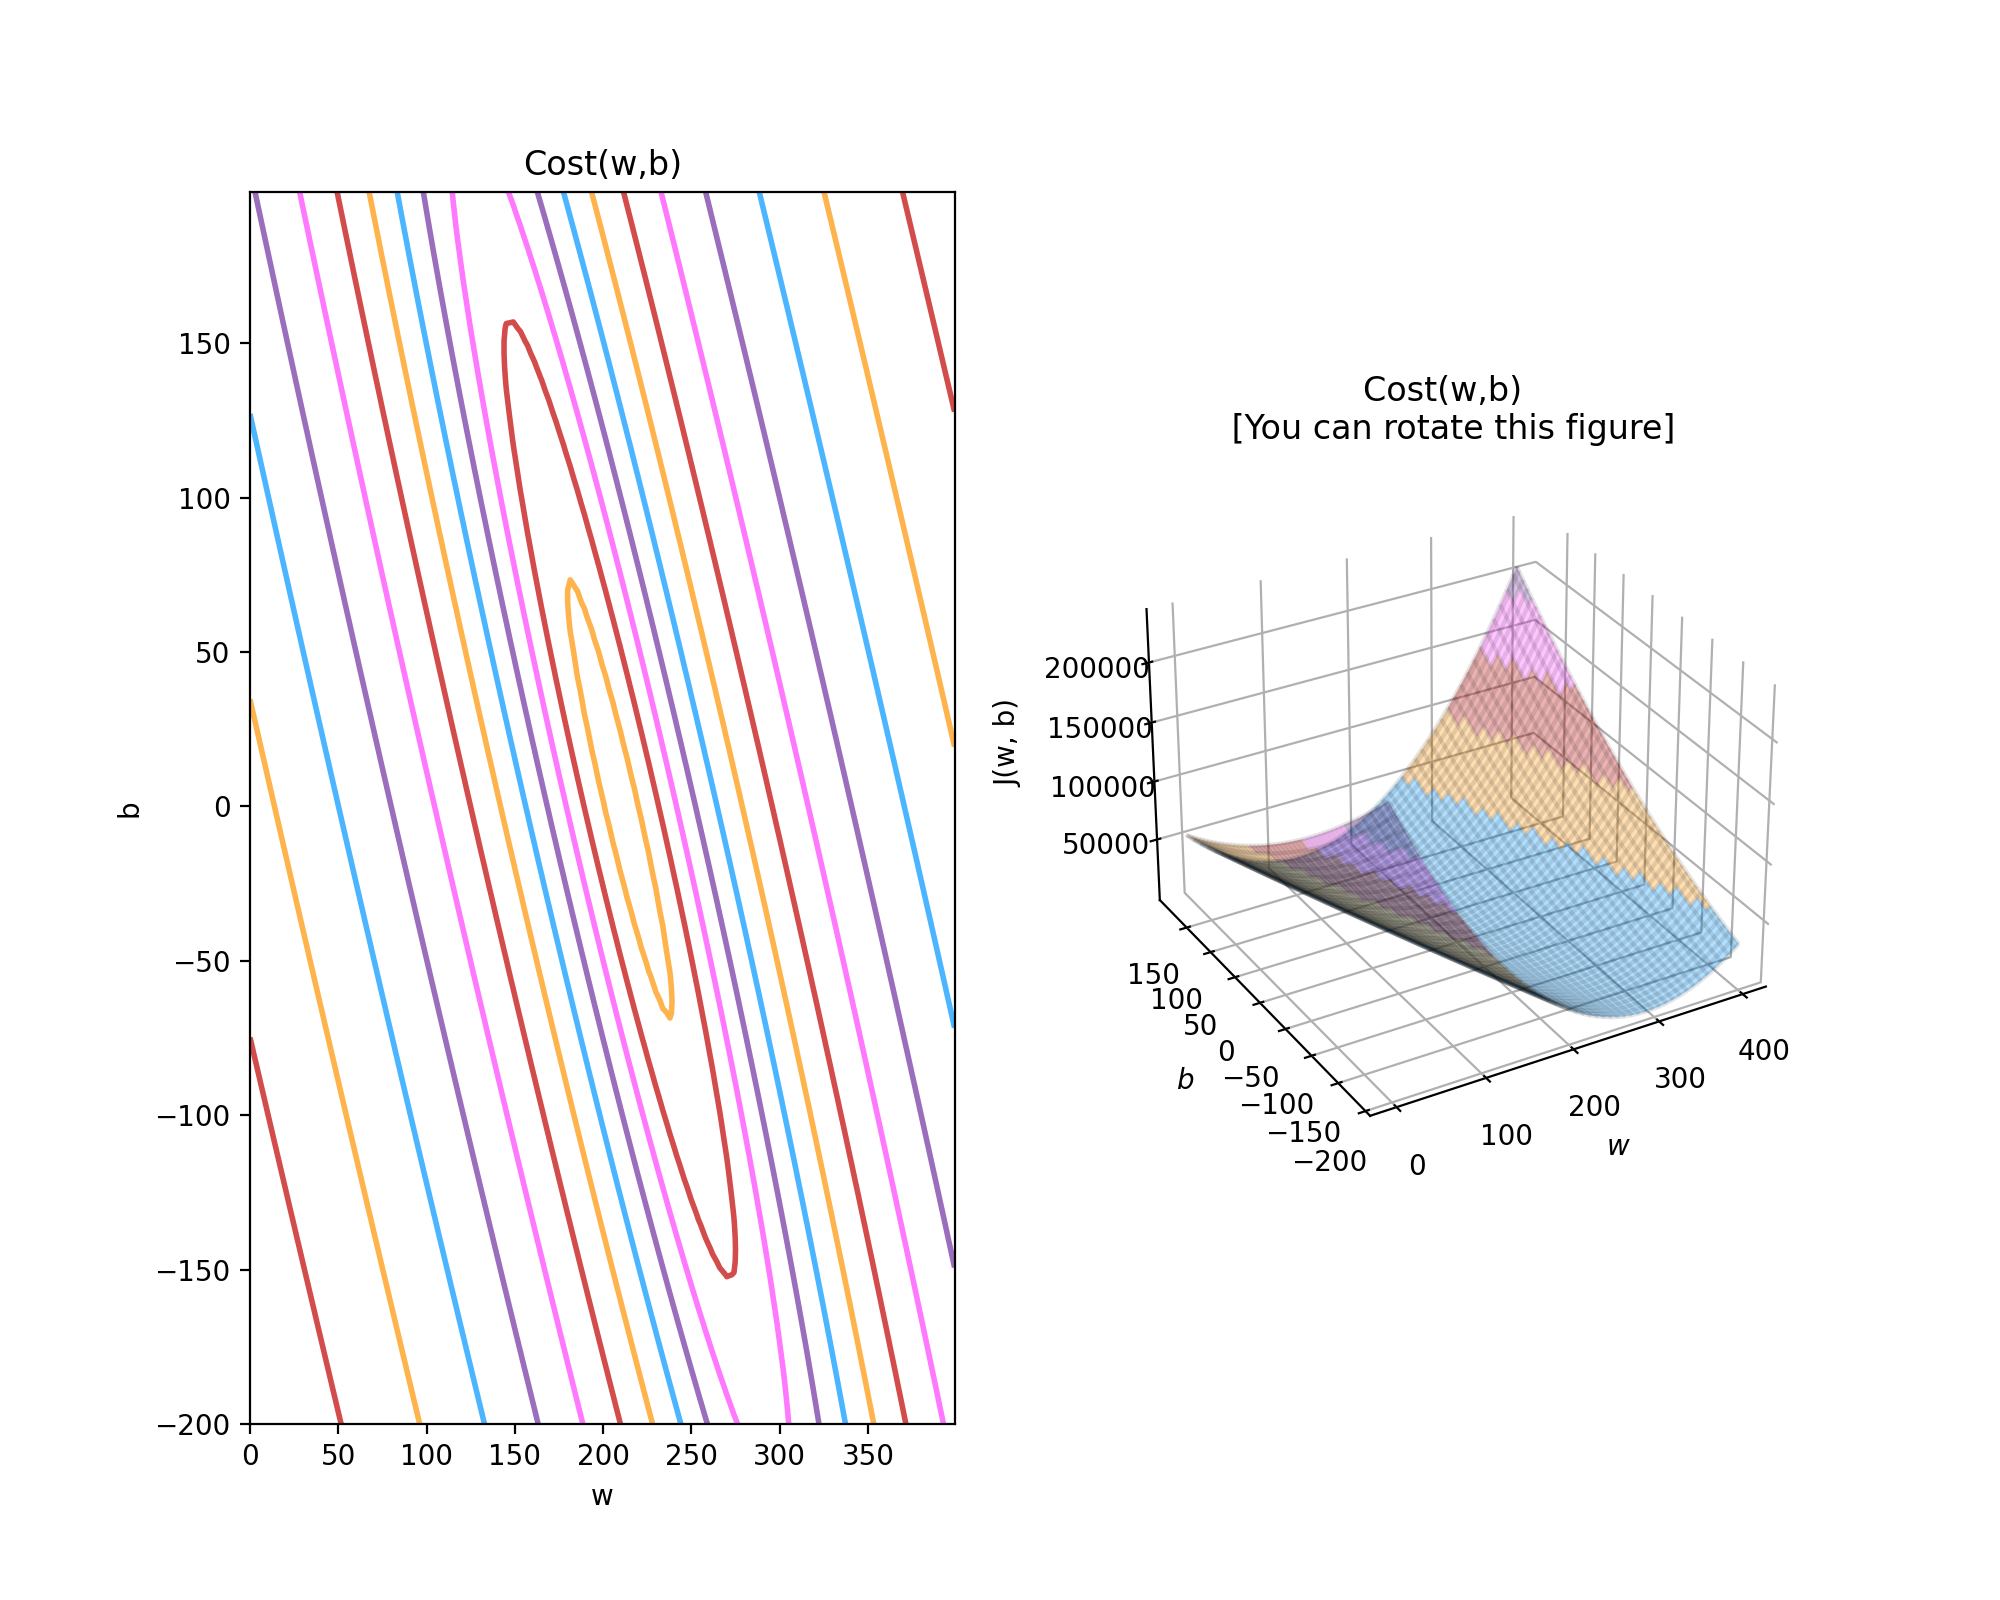

In [15]:
b_arr = np.arange(-200,200,1) #range of values of b
w_arr = np.arange(0,400,1) #range of values of w

fig = plt_cost_3d(x_train, y_train, w_arr, b_arr)

## Exercise 4

A contours in the contour plot represents sets of values of $(w,b)$ that have the same $J$. 

1. How can you find the values of $(w,b)$ were $J$ is a minimum?
2. Why is the contour plot better than the surface plot for finding the minimum?

In the code below, we plot a simple linear (unity) training set in order to see the minimum on the surface plot.

<IPython.core.display.Javascript object>


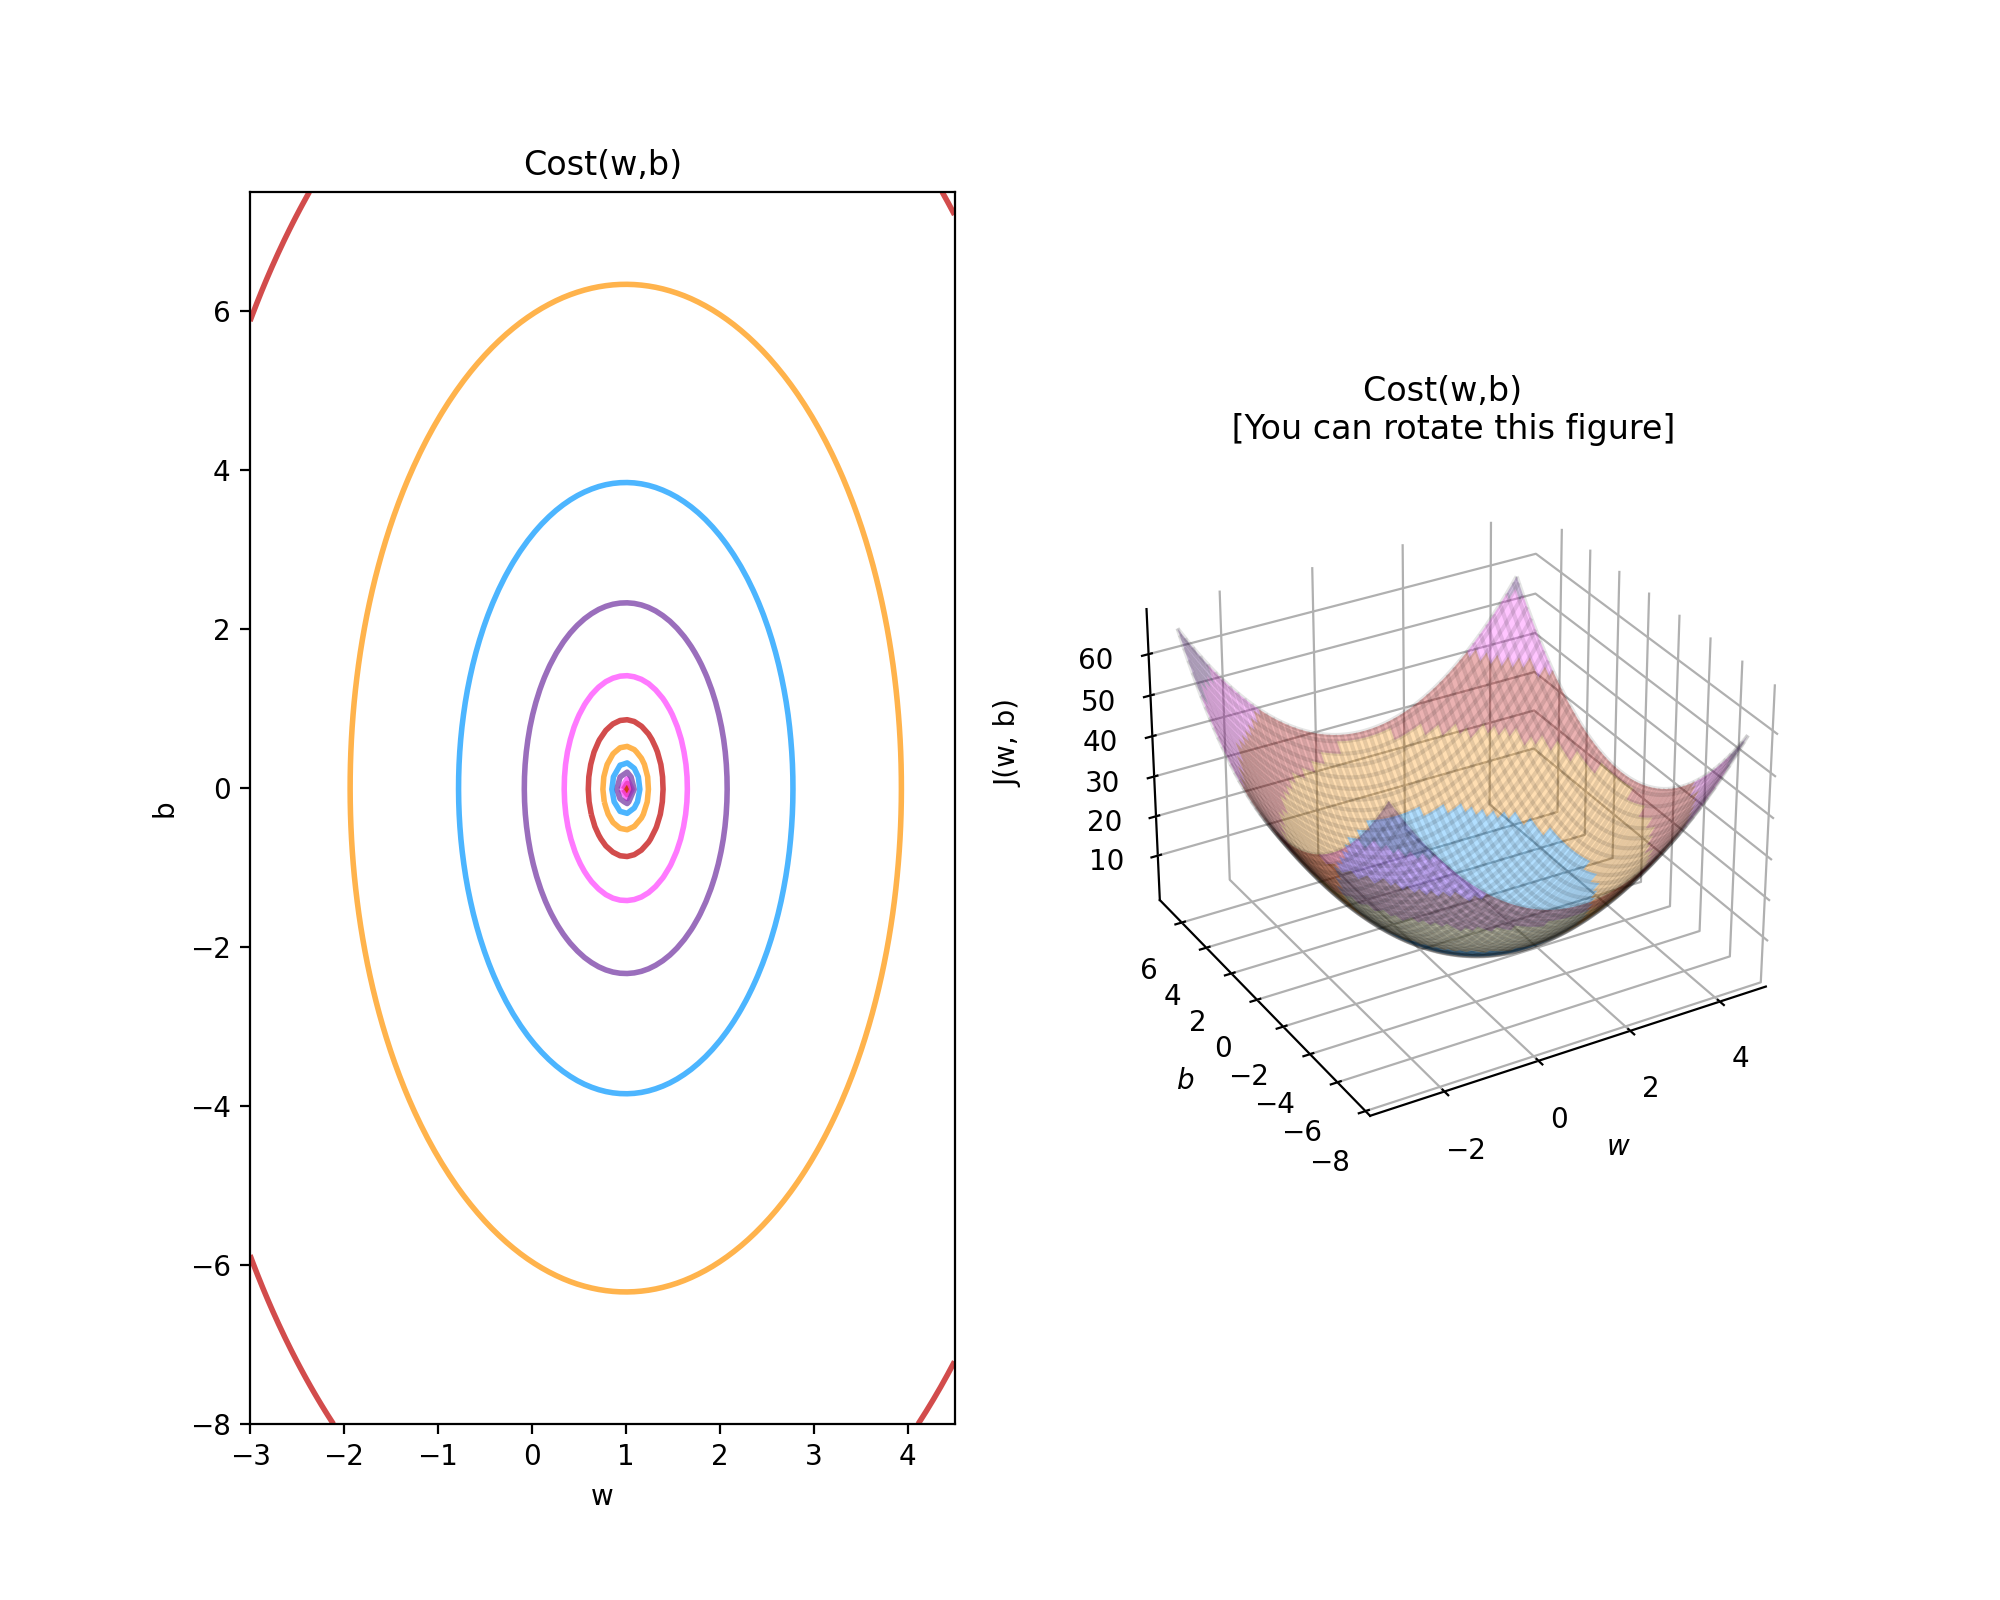

In [16]:
x_train = np.array([-3.0, -2.0, -1.0, 1.0, 2.0, 3.0])
y_train = np.array([-3.0, -2.0, -1.0, 1.0, 2.0, 3.0])

b_arr = np.arange(-8,8,0.5) #range of values of b
w_arr = np.arange(-3,5,0.5) #range of values of w

fig = plt_cost_3d(x_train, y_train, w_arr, b_arr)


## Summary

In this notebook we manually adjusted $w$ and $b$ and found the values that minimized the cost for a linear fit to the training set. Ultimately we want the computer to *learn* these values.